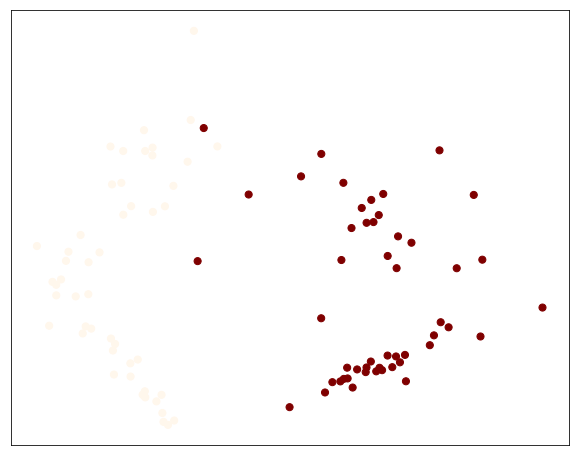

In [21]:
%matplotlib inline

import sklearn.datasets as sd
import numpy as np
import matplotlib.pyplot as plt

X, y = ds.make_classification(n_features=2, n_classes=2, n_samples=100, n_redundant=0, random_state=1)

plt.figure(1, figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.OrRd, s=50)
plt.xticks(())
plt.yticks(())
plt.show()

In [22]:
import time

def get_model_times(model, sample_sizes=(100, 300, 1000, 3000, 10000, 30000, 100000)):
    times = []
    for sample_size in sample_sizes:
        t_0 = time.time()
        X, y = sd.make_classification(n_features=2, n_classes=2, n_samples=sample_size, n_redundant=0, random_state=1)
        model = model.fit(X,y)
        times.append(time.time() - t_0)
    return sample_sizes, times

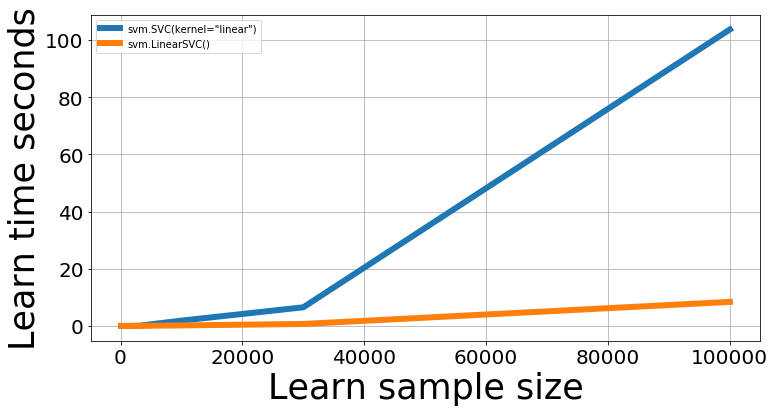

In [23]:
import sklearn.svm as svm

fig = plt.figure(figsize=(12, 6))
h1, = plt.plot(*get_model_times(svm.SVC(kernel='linear', C=1.0)), linewidth=6, label='svm.SVC(kernel="linear")')
h2, = plt.plot(*get_model_times(svm.LinearSVC(C=1.0)), linewidth=6, label='svm.LinearSVC()')

ax = plt.gca()
labels = ax.yaxis.get_majorticklabels() + ax.xaxis.get_majorticklabels()
for label in labels:
    label.set_fontsize(20)
ax.set_ylabel('Learn time seconds', fontsize=35)
ax.set_xlabel('Learn sample size', fontsize=35)

plt.legend(handles=[h1, h2])
plt.grid(True)
plt.show()

In [55]:
def plot_results(model, X, y, level=1.0, cmap=plt.cm.OrRd, use_decision_function=True):
    
    plt.figure(1, figsize=(10, 8))
    plt.clf()
    
    if hasattr(model, 'support_vectors_'):
        plt.scatter(model.support_vectors_[:, 0],
                    model.support_vectors_[:, 1],
                    s=150, facecolors='none', zorder=10)
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=cmap, s=50)

    plt.axis('tight')

    def get_shifted_bounds(v, fraction=1.0/10):
        v_min, v_max = np.min(v), np.max(v)
        v_shift = np.abs(v_max - v_min) * fraction
        return v_min - v_shift, v_max + v_shift

    x_min, x_max = get_shifted_bounds(X[:, 0])
    y_min, y_max = get_shifted_bounds(X[:, 1])

    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    
    if hasattr(model, 'decision_function') and use_decision_function:
        Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
    else:
        Z = model.predict(np.c_[XX.ravel(), YY.ravel()])

        
    Z = Z.reshape(XX.shape)
    plt.figure(1, figsize=(10, 8))
    plt.pcolormesh(XX, YY, Z, cmap=cmap)
    if hasattr(model, 'support_vectors_'):
        plt.contour(XX, YY, Z,
                    colors=['k', 'k', 'k'],
                    linestyles=['--', '-', '--'],
                    levels=[-level, 0, level])
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    plt.show()

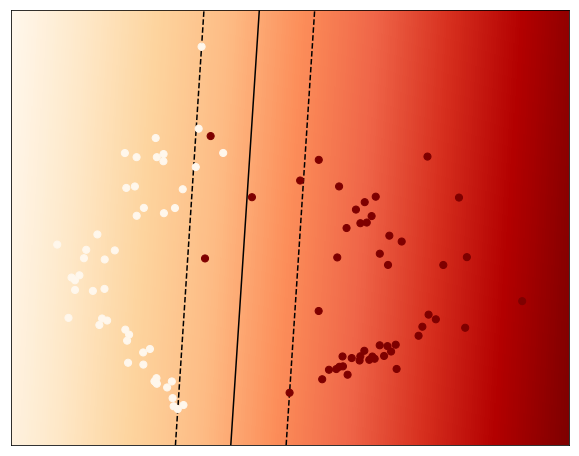

In [56]:
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X, y)
plot_results(model, X, y, level=1.0)

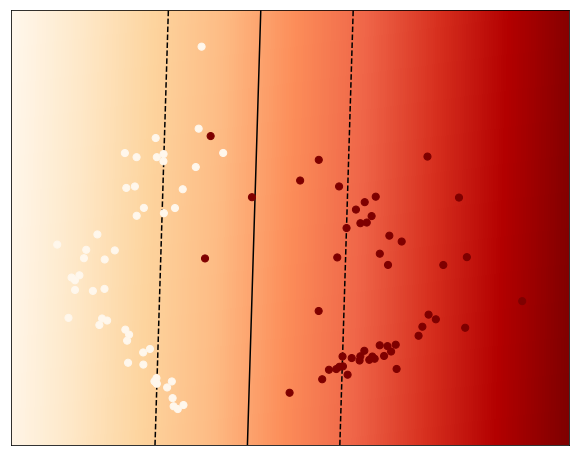

In [54]:
model = svm.SVC(kernel='linear', C=0.1)
model.fit(X, y)
plot_results(model, X, y, level=1.0)

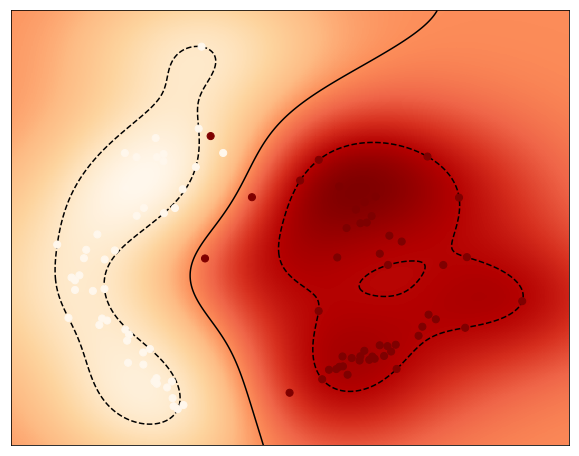

In [57]:
model = svm.SVC(kernel='rbf', C=1.0, gamma=1.0)
model.fit(X, y)
plot_results(model, X, y, level=1.0)

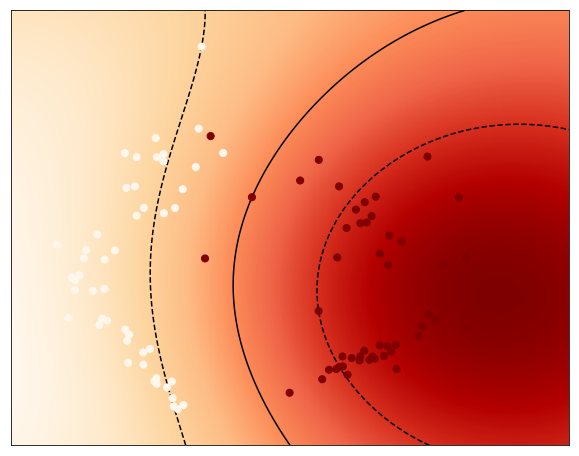

In [59]:
model = svm.SVC(kernel='rbf', C=1.0, gamma=0.1)
model.fit(X, y)
plot_results(model, X, y, level=1.0)